In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/burger-resnet50/burger_resnet50.jpeg
/kaggle/input/dog-resnet50/dog_resnet50.png
/kaggle/input/diabetes/diabetes.csv


In [3]:
# Importer les librairies Python :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
# Ouvrir la base de données à partir d'une saisie manuelle via la console :

open_file = input()

if open_file == '':
    print("Aucune base de données n'a été trouvée")
    
if open_file == 'Importer la base de données':
    path = '/kaggle/input/diabetes/diabetes.csv'
    df = pd.read_csv(path)

 Importer la base de données


In [8]:
# Afficher la base de données :
df.head()
# Valeurs manquantes :
missing_values = [df[c].isnull().sum() for c in df.columns]
print(missing_values)

[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

# Regroupement des covariables et de la variable target :
X = df[['Glucose', 'Age', 'BMI']]
y = df['Outcome']

# On sépare notre en ensemble de données en deux échantillons (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

'''
    Création d'un réseau de neurones artificiels avec deux couches cachées, 
    la première couche contient 5 neurones et la deuxième couche 15.
'''
# Réseau de neurones artificiels:
model_NN = Sequential()
# Première couche :
model_NN.add(Dense(5, input_shape = (3,), activation='relu'))
# Première couche :
model_NN.add(Dense(15, activation='relu'))
# Couche de sortie :
model_NN.add(Dense(1, activation='sigmoid'))

# Imprimer le détail de l'architecture du réseau de neurones :
print(model_NN.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126 (504.00 B)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
#Compilation du modèle avec l'algorithme d'optimisation, la fonction de perte et la métrique :
model_NN.compile(optimizer='adam', loss='binary_crossentropy',
                metrics=['accuracy'])

# Ajustement du modèle :
mfit= model_NN.fit(X_train, y_train, validation_data=(X_test, y_test), 
            epochs=50, verbose='auto', batch_size=None)

Epoch 1/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4375 - loss: 26.3837

I0000 00:00:1720056981.967400     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.3638 - loss: 27.4106 - val_accuracy: 0.3571 - val_loss: 20.7323
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 18.5862 - val_accuracy: 0.3571 - val_loss: 11.2414
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3376 - loss: 9.0295 - val_accuracy: 0.3636 - val_loss: 1.6688
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5133 - loss: 1.1277 - val_accuracy: 0.6429 - val_loss: 1.0542
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5392 - loss: 0.8537 - val_accuracy: 0.4286 - val_loss: 0.7409
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.7313 - val_accuracy: 0.4481 - val_loss: 0.7326
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4897 - loss: 0.7322 - val_accuracy: 0.5974 - val_loss: 0.7362
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4858 - loss: 0.7495 - val_accuracy: 0.6169 - val_loss: 0.745

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7199 - loss: 0.6007
0.723127007484436
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.6323 
0.6688311696052551


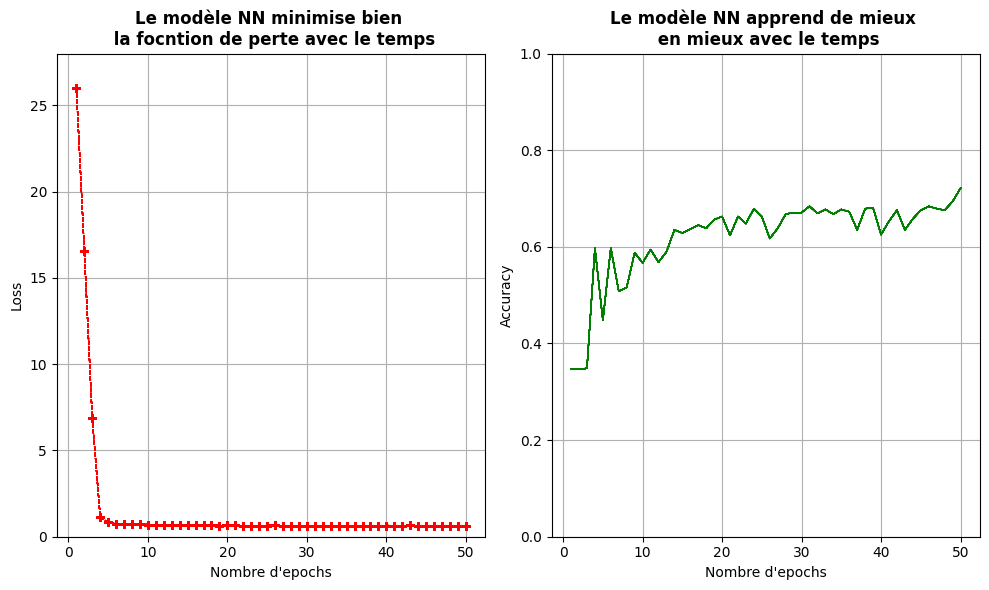

In [11]:
# Afficher la précision du modèle sur l'échantillon train/test :
print(model_NN.evaluate(X_train, y_train)[1])
# Afficher la précision du modèle sur l'échantillon train/test :
print(model_NN.evaluate(X_test, y_test)[1])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,6))
plt.style.use('bmh')

epochs = np.arange(1,51,1)

for epoch in epochs :
    ax1.plot(epochs, mfit.history['loss'], label='Loss', color='red',
           linestyle='dashed', lw=0.8, marker='+')
    ax1.set_ylim(0,28)
    ax1.set_xlabel("Nombre d'epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title('Le modèle NN minimise bien \n la focntion de perte avec le temps', 
                  fontsize=12, fontweight='bold')
    ax1.grid(True)
    
    ax2.plot(epochs, mfit.history['accuracy'], label='Accuracy', color='green',
           linestyle='solid', lw=0.8, marker=None )
    ax2.set_ylim(0,1)
    ax2.set_xlabel("Nombre d'epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title('Le modèle NN apprend de mieux \n en mieux avec le temps',
                  fontsize=12, fontweight='bold')
    ax2.grid(True)
    plt.tight_layout()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 15)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206 (824.00 B)

 Trainable params: 166 (664.00 B)

 Non-trainable params: 40 (160.00 B)

None
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6087 - loss: 0.7220 - val_accuracy: 0.4935 - val_loss: 0.7773
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.6649 - val_accuracy: 0.5065 - val_loss: 0.7035
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.6165 - val_accuracy: 0.5844 - val_loss: 0.6545
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.5668 - val_accuracy: 0.6623 - val_loss: 0.6222
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5764 - val_accuracy: 0.7208 - val_loss: 0.6025
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5790 - val_accuracy: 0.7662 - val_loss: 0.5879
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7380 - loss: 0.5387 - val_accuracy: 0.7208 - val_loss: 0.5758
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.5621 - val_accuracy: 0.7403 - val

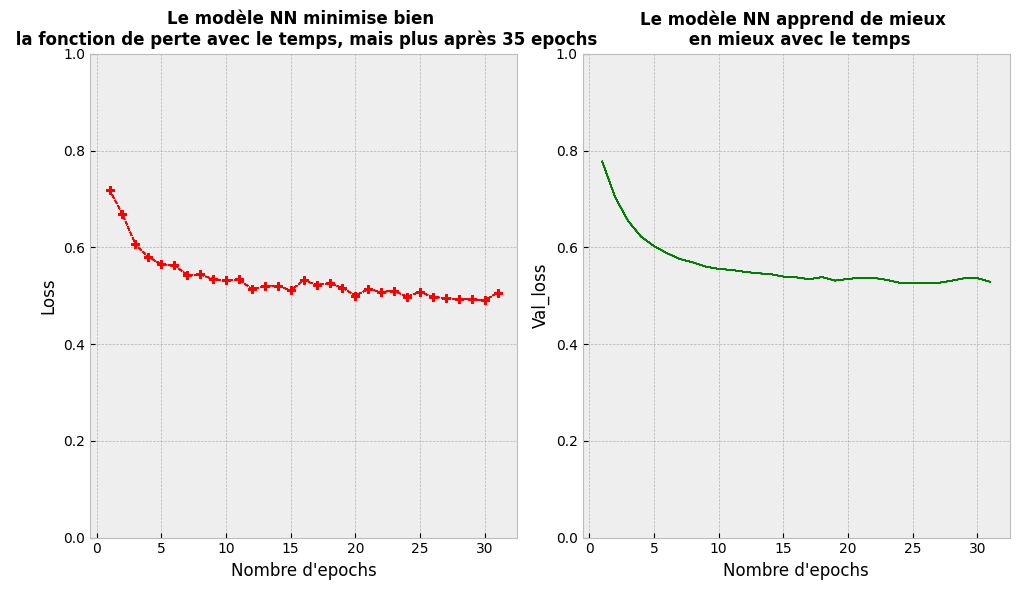

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def NeuralNetworkBatchNormalization():
    
    model_NNBN = Sequential()
    model_NNBN.add(Dense(5, input_shape= (3,), activation='relu'))
    model_NNBN.add(BatchNormalization())
    model_NNBN.add(Dense(15, activation='relu'))
    model_NNBN.add(BatchNormalization())
    model_NNBN.add(Dense(1, activation='sigmoid'))
    
    print(model_NNBN.summary())
    
    model_NNBN.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
    
    # Arrêt anticipé pour éeviter le surajustement: 
    '''
    L'arrêt anticipé est défini pour surveiller la perte sur l'ensemble de validation 
    et arrêter l'entraînement si la perte ne s'améliore pas pendant 5 époques.
    '''
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    
    mfit = model_NNBN.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=50, verbose='auto', callbacks=[early_stopping])
    
    loss_history = []
    accuracy_history = []
    
    val_loss_history = []
    val_accuracy_history = []
    
    loss_history.append(mfit.history['loss'])
    accuracy_history.append(mfit.history['accuracy'])
    val_loss_history.append(mfit.history['val_loss'])
    val_accuracy_history.append(mfit.history['val_accuracy'])
    
    
    print(model_NNBN.evaluate(X_train, y_train)[1])
    print(model_NNBN.evaluate(X_test, y_test)[1])
    
    if model_NNBN.evaluate(X_train, y_train) == None:
        print('Le modèle NNBN est mal spécifié')
    if model_NNBN.evaluate(X_train, y_train)[1] > model_NNBN.evaluate(X_test, y_test)[1] :
        print('Surajustement du modèle')
    if model_NNBN.evaluate(X_train, y_train)[1] < model_NNBN.evaluate(X_test, y_test)[1] :
        print('Bon modèle')
        
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,6))
    plt.style.use('bmh')
    
    epochs =  np.arange(1, len(mfit.history['loss']) + 1)

    for epoch in epochs :
        ax1.plot(epochs, mfit.history['loss'], label='Loss', color='red',
               linestyle='dashed', lw=0.8, marker='+')
        ax1.set_ylim(0,1)
        ax1.set_xlabel("Nombre d'epochs")
        ax1.set_ylabel("Loss")
        ax1.set_title('Le modèle NN minimise bien \n la fonction de perte avec le temps, mais plus après 35 epochs', 
                      fontsize=12, fontweight='bold')
        ax1.grid(True)

        ax2.plot(epochs, mfit.history['val_loss'], label='Val_loss', color='green',
               linestyle='solid', lw=0.8, marker=None )
        ax2.set_ylim(0,1)
        ax2.set_xlabel("Nombre d'epochs")
        ax2.set_ylabel("Val_loss")
        ax2.set_title('Le modèle NN apprend de mieux \n en mieux avec le temps',
                      fontsize=12, fontweight='bold')
        ax2.grid(True)
        plt.tight_layout()
    
    
NeuralNetworkBatchNormalization()

    Utilisation du BatchNormalization :
    
Batch normalization est une technique couramment utilisée dans les réseaux de neurones, y compris dans les modèles créés avec TensorFlow et Keras. Elle aide à stabiliser et à accélérer l'entraînement du réseau neuronal en normalisant les activations de chaque couche.

Voici quelques avantages de l'utilisation de la normalisation par lots (batch normalization) :

1. **Stabilité de l'entraînement :** En normalisant les activations de chaque couche pendant l'entraînement, la batch normalization réduit la dépendance sur les initialisations des poids et rend le processus d'entraînement plus stable.

2. **Réduction du problème de disparition du gradient :** La normalisation par lots peut aider à atténuer le problème de disparition du gradient en maintenant les activations dans une plage plus contrôlée, ce qui facilite la propagation du gradient pendant la rétropropagation.

3. **Accélération de l'entraînement :** En réduisant les problèmes liés à la variance des données et en favorisant la convergence plus rapide du modèle, la batch normalization peut accélérer le processus d'entraînement du réseau.

4. **Régularisation :** La batch normalization agit également comme une forme de régularisation, en introduisant un peu de bruit dans chaque mini-lot d'entraînement, ce qui peut aider à prévenir le surapprentissage.

En résumé, l'utilisation de la batch normalization dans les modèles TensorFlow/Keras Sequential peut améliorer la stabilité et la vitesse d'entraînement du modèle, tout en agissant comme une forme de régularisation pour aider à prévenir le surapprentissage.

# Convolutional Neural Network (CNN)  Réseau neuronal convolutif (RNC)

    Introduction au modèle convolutif : 
En apprentissage automatique, un réseau de neurones convolutifs ou réseau de neurones à convolution est un type de réseau de neurones artificiels acycliques, dans lequel le motif de connexion entre les neurones est inspiré par le cortex visuel des animaux.

    Principe 
   Un modèle convolutionnel, souvent abrégé en modèle convolutif ou CNN (pour Convolutional Neural Network en anglais), est un type spécifique de réseau de neurones artificiels utilisé principalement pour le traitement des données structurées en grille, comme les images et les vidéos. 

Ce modèle est particulièrement efficace pour capturer des motifs spatiaux dans les données, en utilisant des opérations de convolution qui permettent de détecter des caractéristiques locales telles que des bords, des formes et des textures. Les CNN sont largement utilisés dans des domaines tels que la vision par ordinateur, la reconnaissance d'objets, la reconnaissance faciale, la classification d'images, ainsi que dans des applications plus complexes comme la segmentation sémantique et la génération d'images.

Les caractéristiques clés des CNN incluent l'utilisation de couches de convolution, de couches de pooling pour réduire la dimensionnalité, et de couches entièrement connectées pour la classification finale. Ils ont été révolutionnaires dans le domaine de l'apprentissage profond pour leur capacité à apprendre des représentations hiérarchiques complexes des données à partir des pixels bruts, sans nécessiter d'extraction de caractéristiques manuelle.

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Chargement des données MNIST et division en ensembles d'entraînement et de test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisation des valeurs de pixel à une échelle de 0 à 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionnement des données pour correspondre à la forme attendue par le modèle (ajouter une dimension pour le canal)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convertir les étiquettes en catégories (encodage one-hot)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Initialisation du modèle
model = Sequential()

# Ajout des couches Conv2D et MaxPooling2D
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les features maps en un vecteur pour les entrées dans la couche Dense de sortie
model.add(Flatten())

# Couche Dense de sortie avec activation softmax pour la classification à 10 classes (chiffres de 0 à 9)
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec une fonction de perte (loss) et un optimiseur
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Prédiction d'une seule image du jeu de données de test
img = X_test[50]
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f'Prediction: {predicted_digit}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


2024-07-04 01:47:00.147110: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-07-04 01:47:00.147169: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-07-04 01:47:00.147187: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-07-04 01:47:00.147206: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-07-04 01:47:00.147219: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-07-04 01:47:00.147230: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-07-04 01:47:00.147241: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-07-04 01:47:00.147252: E external/local_xla/xla/se

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8434 - loss: 0.5409 - val_accuracy: 0.9714 - val_loss: 0.0991
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.0909 - val_accuracy: 0.9800 - val_loss: 0.0738
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0689 - val_accuracy: 0.9838 - val_loss: 0.0628
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0505 - val_accuracy: 0.9833 - val_loss: 0.0574
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0392 - val_accuracy: 0.9850 - val_loss: 0.0553
292/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9819 - loss: 0.0555

2024-07-04 01:47:19.195900: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-07-04 01:47:19.195949: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-07-04 01:47:19.195959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-07-04 01:47:19.195967: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-07-04 01:47:19.195974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-07-04 01:47:19.195982: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-07-04 01:47:19.195990: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-07-04 01:47:19.195998: E external/local_xla/xla/ser

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0547
Test accuracy: 0.9857000112533569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Prediction: 6


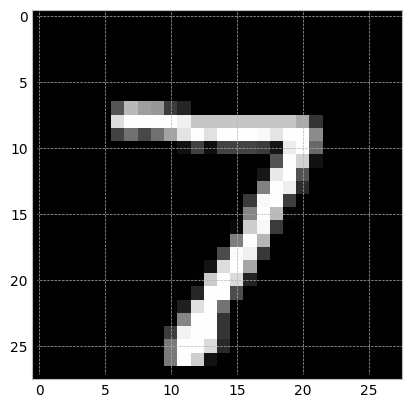

In [25]:
# Image qu'on voulait prédire:
plt.imshow(X_test[0], cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 9


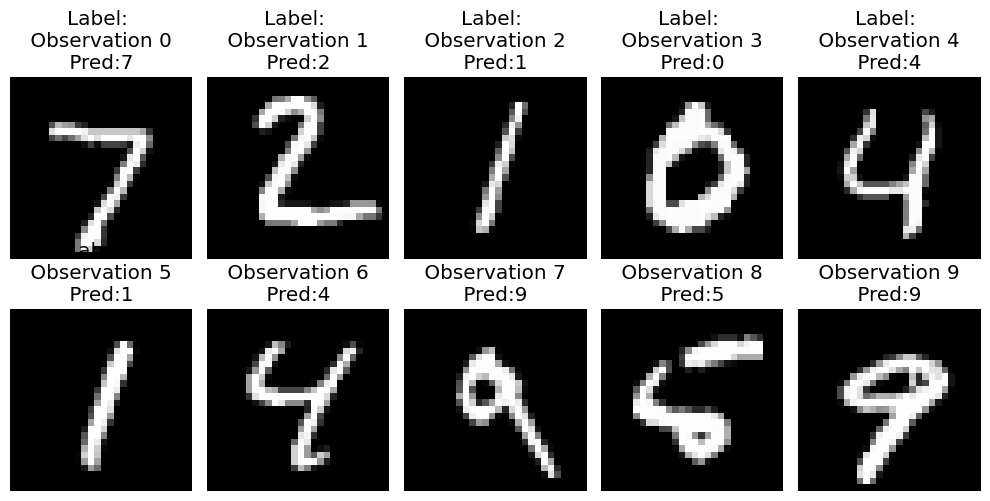

In [26]:
# Afficher les 10 premiers chiffres du jeu de données d'entraînement
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    img = X_test[i]
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    print(f'Prediction: {predicted_digit}')
    plt.title(f'Label: \n Observation {i} \n Pred:{predicted_digit} ')
    plt.axis('off')
plt.tight_layout()
plt.show()

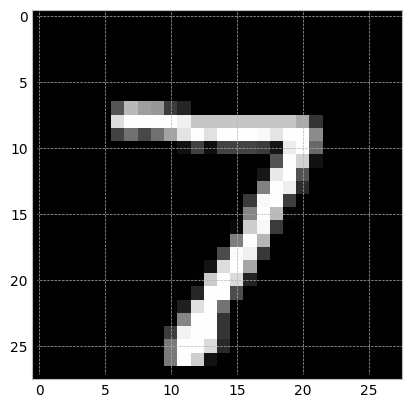

In [27]:
plt.imshow(X_test[0], cmap='gray')

# Autoencodeur - Supprimer le bruit de l'image (Denoising)

    Supprimer les bruits/perturbation des images du dataset MNIST:
    
Un autoencodeur denoising est un type spécialisé de réseau de neurones artificiels utilisé pour reconstruire des données en présence de bruit ou de perturbations. Contrairement à un autoencodeur traditionnel qui cherche simplement à reproduire les données d'entrée, un autoencodeur denoising apprend à reconstruire des données corrompues par du bruit en se concentrant sur les caractéristiques essentielles des données non perturbées. Il se compose d'un encodeur qui transforme les données en une représentation compressée et d'un décodeur qui restaure les données à partir de cette représentation. Les applications incluent la détection d'anomalies, la suppression de bruit dans les images, et l'amélioration de la robustesse des données pour d'autres tâches d'apprentissage automatique.

Les autoencodeurs ont plusieurs applications intéressantes comme la détection d'anomalies ou le débruitage d'images. Ils visent à produire une sortie identique à leurs entrées. Les données d'entrée sont compressées dans un espace de dimensions inférieures, appelé encodage. Ensuite, le modèle apprend à décoder cette représentation pour la ramener à sa forme originale.

Dans notre cas, nous allons encoder et décoder le jeu de données MNIST, qui contient des chiffres manuscrits. La couche cachée de l'autoencodeur va encoder une représentation de 32 dimensions des images, qui sont initialement composées de 784 pixels (28 x 28). L'autoencodeur va donc apprendre à transformer l'image originale de 784 pixels en une image compressée de 32 pixels, et à utiliser cette représentation encodée pour reconstruire l'image originale de 784 pixels.

In [31]:
print('Le nombre de pixels par image est de :', str(X_test.shape[1] * X_test.shape[2]))

Le nombre de pixels par image est de : 784


In [32]:
autoencoder = Sequential()
autoencoder.add(Dense(32, input_shape=(784,), activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))

autoencoder.compile(optimizer='adadelta',  loss='binary_crossentropy')
autoencoder.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
autoencoder.layers[0]

<Dense name=dense_28, built=True>

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6962 - val_loss: 0.6954
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6952 - val_loss: 0.6944
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6942 - val_loss: 0.6934
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6932 - val_loss: 0.6924
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6922 - val_loss: 0.6914
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6913 - val_loss: 0.6905
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6903 - val_loss: 0.6895
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6894 - val_loss: 0.6886
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6884 - val_loss: 0.6877
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6875 - val_loss: 0.6867
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


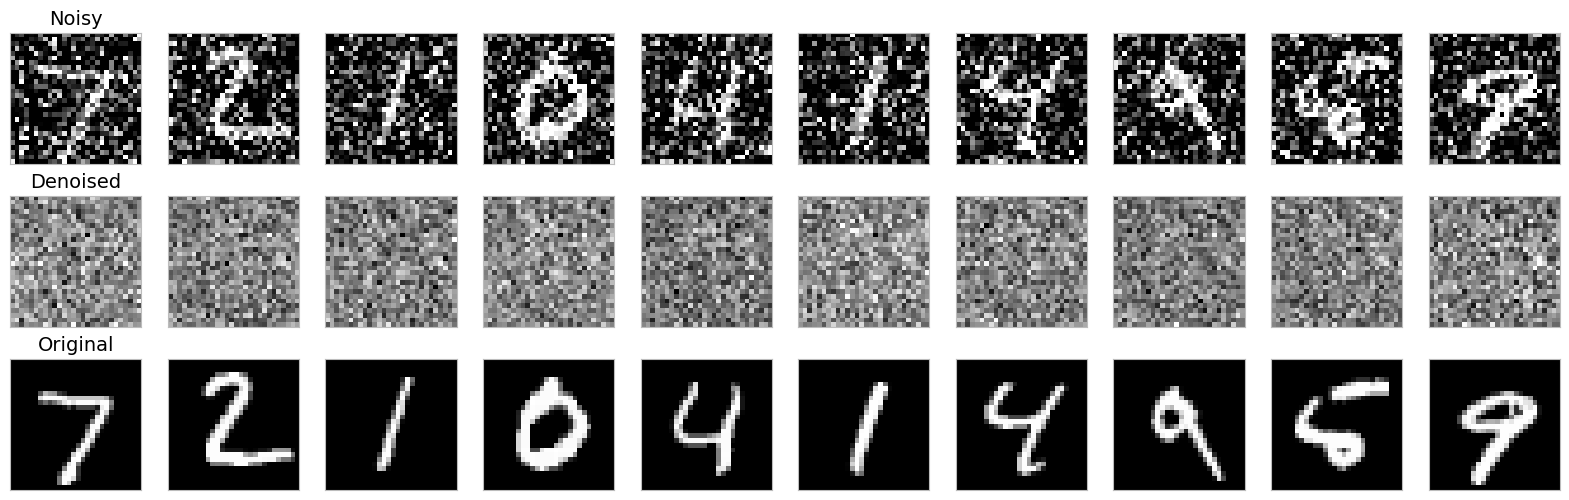

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Chargement du dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalisation des données entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplatir les images en vecteurs de 784 dimensions
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Ajout de bruit gaussien aux images
noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape) 
x_test_noisy = x_test_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape) 

# Assurer que les valeurs restent dans la plage [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Modèle autoencodeur complet
autoencoder = Model(input_img, decoded)

# Compilation de l'autoencodeur
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Entraînement de l'autoencodeur
autoencoder.fit(x_train_noisy, x_train_flat,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_flat))

# Reconstruction des images bruitées
decoded_imgs = autoencoder.predict(x_test_noisy)

# Affichage des images originales, bruitées et reconstruites
n = 10  # Nombre d'images à afficher
plt.figure(figsize=(20, 6))
for i in range(n):
    
     # Image bruitée
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy', fontsize=14)
    
    # Image reconstruite
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Denoised', fontsize=14)
    
    # Image originale
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Original', fontsize=14)
plt.show()


# CNN with ResNet50 

    Introduction à l'archtecture ResNet50 de Microsoft:
    
ResNet-50 est une architecture de réseau neuronal profond qui a révolutionné la vision par ordinateur en introduisant des blocs résiduels. Ces blocs permettent de construire des réseaux très profonds en utilisant des connexions "skip" pour éviter le problème de la disparition du gradient. Grâce à sa profondeur de 50 couches, ResNet-50 a établi de nouveaux standards de performance sur des benchmarks comme ImageNet. Cette architecture est largement utilisée pour la classification d'images, la détection d'objets et d'autres tâches complexes en vision par ordinateur. ResNet-50 a inspiré de nombreuses autres architectures de réseaux neuronaux profonds depuis sa publication en 2015.

In [35]:
import numpy as np
from tensorflow.keras.layers import Dense, BatchNormalization, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions


img_path = "/kaggle/input/burger-resnet50/burger_resnet50.jpeg"

img = image.load_img(path=img_path, target_size=(224,224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n07697313', 'cheeseburger', 0.881527), ('n07693725', 'bagel', 0.112802416), ('n02776631', 'bakery', 0.0041062697)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


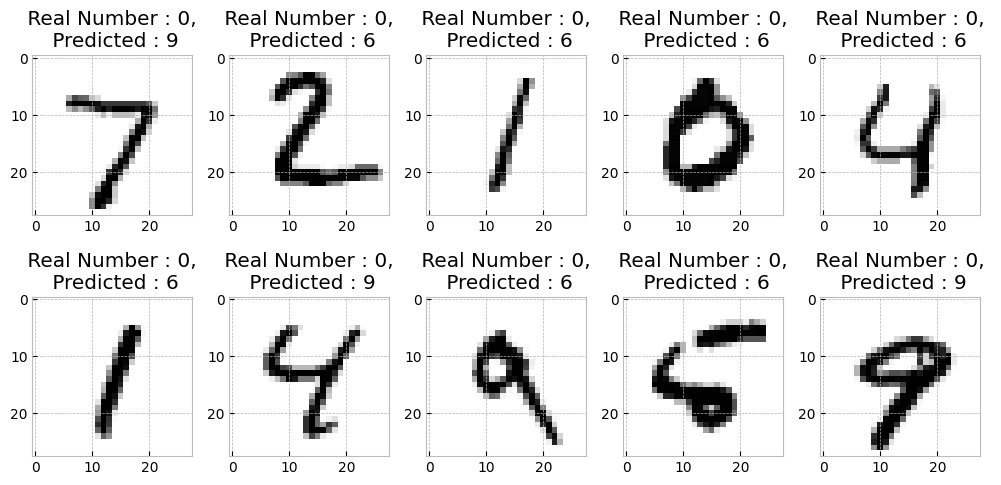

In [41]:
plt.figure(figsize=(10,5))
for i in range(10):
    fig = plt.subplot(2,5, i+1)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    image = x_test[i]
    img = np.expand_dims(image, axis=0)
    prediction = model.predict(img)
    plt.title(f' Real Number : {np.argmax(y_test[i])}, \n Predicted : {np.argmax(prediction)}');
plt.tight_layout()

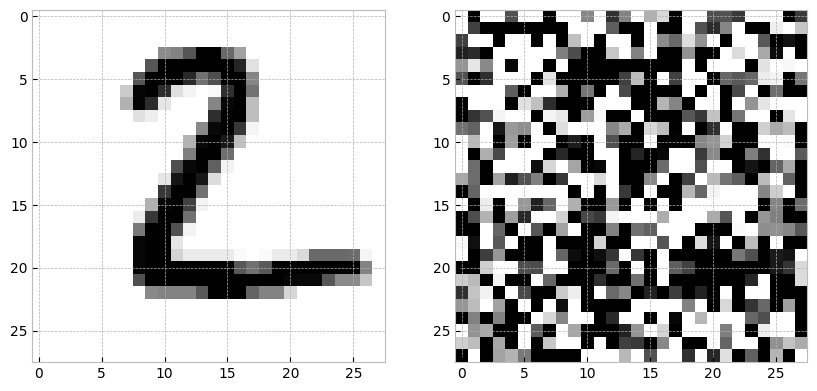

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2538 - val_loss: 0.1959
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1928 - val_loss: 0.1861
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1853 - val_loss: 0.1821
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1815 - val_loss: 0.1811
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1784 - val_loss: 0.1786
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1767 - val_loss: 0.1785


In [53]:
from tensorflow.keras.layers import Dense, Reshape, Input, BatchNormalization, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données MNIST:
'''
On sépare le dataset en échantillon d'entraînement puis en échantillon de test.
'''
(x_train, y_train), (x_test,y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

noisy_factor = 0.5
x_train_noisy = x_train + noisy_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noisy_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(x_test[1].reshape(28,28), cmap=plt.cm.binary)
ax2.imshow(x_test_noisy[1].reshape(28,28), cmap=plt.cm.binary)
plt.show()

# Définition de l'entrée
input_img = Input(shape=(28, 28))

# Aplatir l'image pour l'encodeur
flatten_img = Flatten()(input_img)

# Encodeur
encoded = Dense(128, activation='relu')(flatten_img)
encoded = Dense(32, activation='relu')(encoded)

# Décodeur
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape((28, 28))(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=6, 
               verbose='auto', shuffle=True)

In [55]:
# Reconstruction des images bruitées
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


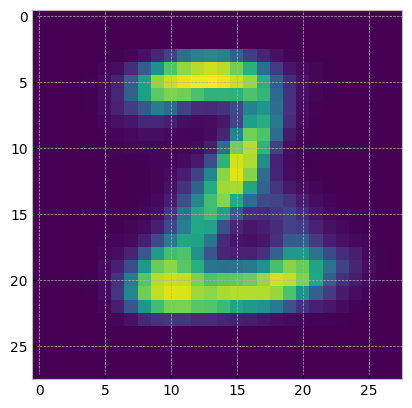

In [56]:
plt.imshow(decoded_imgs[1])